### Based on the paper ***<u>Performance Evaluation of Machine Learning Methods for Breast Cancer Prediction.</u>***

#### This paper uses five Algorithms.
#### Namely: 
#### 1. Support Vector Machine
#### 2. Logistic Regression
#### 3. Random Forest
#### 4. Neural network
#### 5. Decision Tree

## Importing package 

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

%matplotlib inline

## Loading Datasets

In [2]:
bccd = pd.read_csv('Datasets/BCCD.csv')
wbcd = pd.read_csv('Datasets/WBCD.csv')

# Machine Learning Model for BCCD dataset.

## Root map
## 1 --> Healthy
## 2 --> Patient

In [3]:
# To check the head
bccd.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
# To check the value counts of the classification
bccd['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [5]:
# Renaming target values as 0 and 1 
bccd['Classification'] = bccd['Classification'].replace(1,0)
bccd['Classification'] = bccd['Classification'].replace(2,1)

## Analysing dataset

<AxesSubplot:>

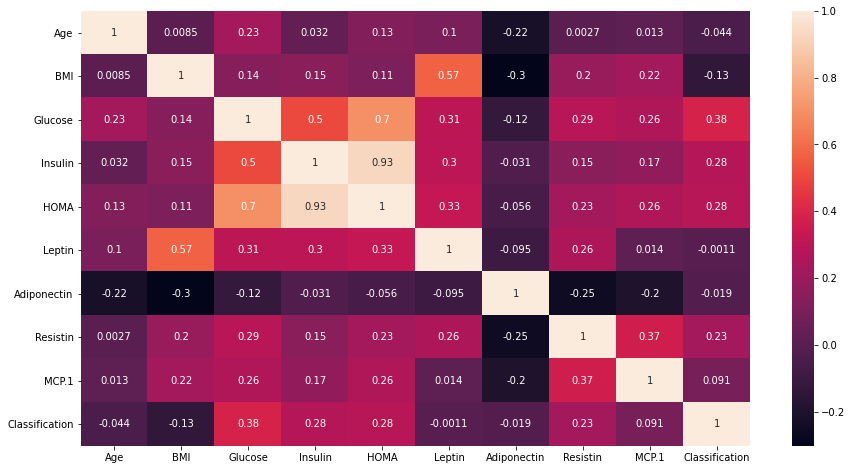

In [8]:
# To check correlation map
cor = bccd.corr()

# Plotting correlation map
plt.figure(figsize=(15,8))
sns.heatmap(cor, annot = True)

# ***Perform Machine Learning Stuff***

## Train Test and Split the dataset

In [13]:
X = bccd.drop('Classification',axis=1)
y = bccd['Classification']

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=101)

## Logistic Regression

In [25]:
# from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(max_iter=10000)

In [26]:
# Training the model
logisticreg.fit(X_train,y_train)

# Predicting the model
predict1 = logisticreg.predict(X_test)

In [34]:
# Printing the Classification Report.
print('Classification Report for Logistic Regression:' + '\n\n' + classification_report(y_test,predict1))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.68      0.63      0.65        43
           1       0.69      0.73      0.71        49

    accuracy                           0.68        92
   macro avg       0.68      0.68      0.68        92
weighted avg       0.68      0.68      0.68        92



## Support Vector Machine

In [30]:
svm = SVC()

In [31]:
# Training the model
svm.fit(X_train,y_train)

# Predicting the model
predict2 = svm.predict(X_test)

In [35]:
# Printing the Classification Report.
print('Classification Report for Support Vector Machine:' + '\n\n' + classification_report(y_test,predict2))

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.53      1.00      0.70        49

    accuracy                           0.53        92
   macro avg       0.27      0.50      0.35        92
weighted avg       0.28      0.53      0.37        92

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

## Random Forest

In [42]:
rm = RandomForestClassifier(n_estimators=200)

In [43]:
# Training the model
rm.fit(X_train,y_train)

# Predicting the model
predict3 = rm.predict(X_test)

In [44]:
# Printing the Classification Report.
print('Classification Report for Random Forest:' + '\n\n' + classification_report(y_test,predict3))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.61      0.40      0.48        43
           1       0.59      0.78      0.67        49

    accuracy                           0.60        92
   macro avg       0.60      0.59      0.58        92
weighted avg       0.60      0.60      0.58        92



## Decision Tree

In [45]:
dt = DecisionTreeClassifier()

In [46]:
# Training the model
dt.fit(X_train,y_train)

# Predicting the model
predict4 = dt.predict(X_test)

In [47]:
# Printing the Classification Report.
print('Classification Report for Decision Tree:' + '\n\n' + classification_report(y_test,predict4))

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.65      0.51      0.57        43
           1       0.64      0.76      0.69        49

    accuracy                           0.64        92
   macro avg       0.64      0.63      0.63        92
weighted avg       0.64      0.64      0.64        92



## Comapring the algorithms using ROC Curve Plot

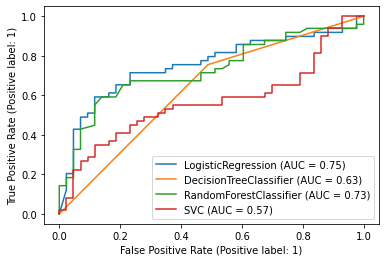

In [69]:
classifiers = [logisticreg,dt,rm,svm]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)